## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [70]:
DF_raw = pd.read_csv('mapdataall.csv')
show(DF_raw)

**Q1** How many variables and observations?

**Q2** How many different incident types are there?

**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

In [73]:
rows,columns = DF_raw.shape
print(rows)
print(columns)

2745
23


There are 23 variables and 2745 observations


In [76]:
incidents = DF_raw[['incident_type']].value_counts()
incidents

incident_type
Wildfire         1481
Fire               29
Flood               1
Name: count, dtype: int64

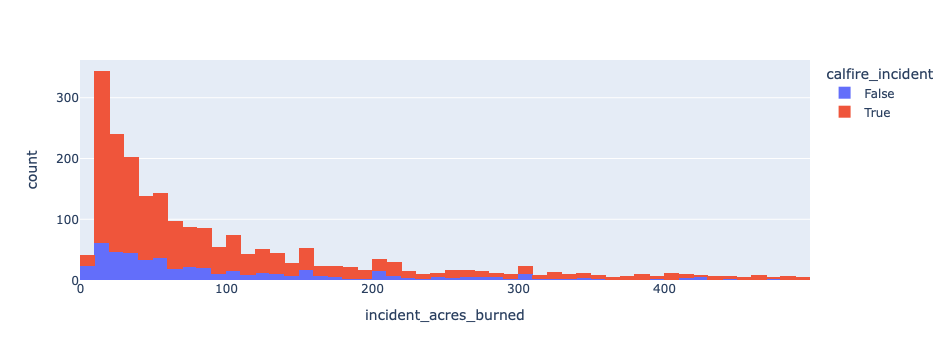

In [78]:
mask = DF_raw['incident_acres_burned'] < 500
DF_raw = DF_raw[mask]

fig = px.histogram(DF_raw,
                    x='incident_acres_burned',
                   color='calfire_incident'
                   )


fig.show()

The largest fire is 257,314 which is the only fire that is larger then 100,000

## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [102]:
my_website = 'https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films'
DF = pd.read_html(my_website)
DF_raw = DF[0]
show(DF_raw)

In [100]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1948,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1929,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [98]:
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

,Awards,count
0,1,979
1,2,156
2,3,77
3,4,47
4,0 (1),32
5,5,25
6,7,12
7,6,12
8,1 (1),8
9,8,7


In [104]:
DF_raw['Awards'] = DF_raw['Awards'].apply(lambda x: int(x.split('(')[0]))
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

,Awards,count
0,1,987
1,2,157
2,3,78
3,4,48
4,0,36
5,5,26
6,7,13
7,6,13
8,8,8
9,11,3


**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [110]:
nominations = DF_raw['Nominations'].value_counts()
DF_nominations = nom_data.reset_index().rename(columns={"index": "value", 0: "count"})
show(DF_nominations)

In [112]:
DF_raw['Nominations'] = DF_raw['Nominations'].apply(lambda x: int(x.split('[')[0]))
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
show(DF_award)

## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.

In [150]:
#Read that data into Python using the Pandas commands we learned
DF = pd.read_csv('all-states-history.csv')
show(DF)

Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.

In [124]:
DF.shape

(20780, 41)

In [126]:
DF.dtypes

date                                 object
state                                object
death                               float64
deathConfirmed                      float64
deathIncrease                         int64
deathProbable                       float64
hospitalized                        float64
hospitalizedCumulative              float64
hospitalizedCurrently               float64
hospitalizedIncrease                  int64
inIcuCumulative                     float64
inIcuCurrently                      float64
negative                            float64
negativeIncrease                      int64
negativeTestsAntibody               float64
negativeTestsPeopleAntibody         float64
negativeTestsViral                  float64
onVentilatorCumulative              float64
onVentilatorCurrently               float64
positive                            float64
positiveCasesViral                  float64
positiveIncrease                      int64
positiveScore                   

There are 20780 rows and 41 columns in this data set. The data is a mix of ints, floats, and objects

Try to do summary statistics (.describe()). Does it work like expected?

In [138]:
DF_summary = DF.describe()
show(DF_summary)

Most of the data looks as it would be expected except but the values for the min value is a little confusing. Below I looked more into the deathIncrease column as it has a negitive min value


In [144]:
death_increase = DF['deathIncrease'].value_counts()
DF_death_increase = death_increase.reset_index().rename(columns={"index": "value", 0: "count"})
show(DF_death_increase)

Online it says that the deathIncrease column is the daily increase in deaths, calculated from the previous day’s value. This means that a negitive value means that there was a decrease in death counts from covid day to day. The data does not need to be fixed.

Make some sort of graph using columns in your data.

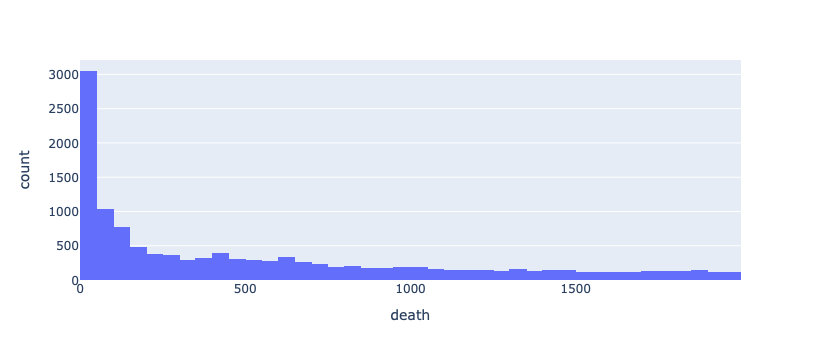

In [162]:
mask = DF['death'] < 2000
DF = DF[mask]
fig = px.histogram(DF,
                    x='death',
                   )


fig.show()